![Facial Recognition](facialrecognition.jpg)

You are a member of an elite group of data scientists, specialising in advanced facial recognition technology, this firm is dedicated to identifying and safeguarding prominent individuals from various spheres—ranging from entertainment and sports to politics and philanthropy. The team's mission is to deploy AI-driven solutions that can accurately distinguish between images of notable personalities and the general populace, enhancing the personal security of such high-profile individuals. You're to focus on Arnold Schwarzenegger, a figure whose accomplishments span from bodybuilding champion to Hollywood icon, and from philanthropist to the Governor of California. 

### **The Data**
The `data/lfw_arnie_nonarnie.csv` dataset contains processed facial image data derived from the "Labeled Faces in the Wild" (LFW) dataset, focusing specifically on images of Arnold Schwarzenegger and other individuals not identified as him. This dataset has been prepared to aid in the development and evaluation of facial recognition models. There are 40 images of Arnold Schwarzenegger and 150 of other people.

| Column Name | Description |
|-------------|-------------|
| PC1, PC2, ... PCN | Principal components from PCA, capturing key image features. |
| Label | Binary indicator: `1` for Arnold Schwarzenegger, `0` for others. |

Best Model: LogisticRegression
Best Model Parameters: {'classifier__C': 1}
Cross-validation Score: 0.8344
Test Accuracy: 0.8158
Precision: 1.0000
Recall: 0.1250
F1 Score: 0.2222


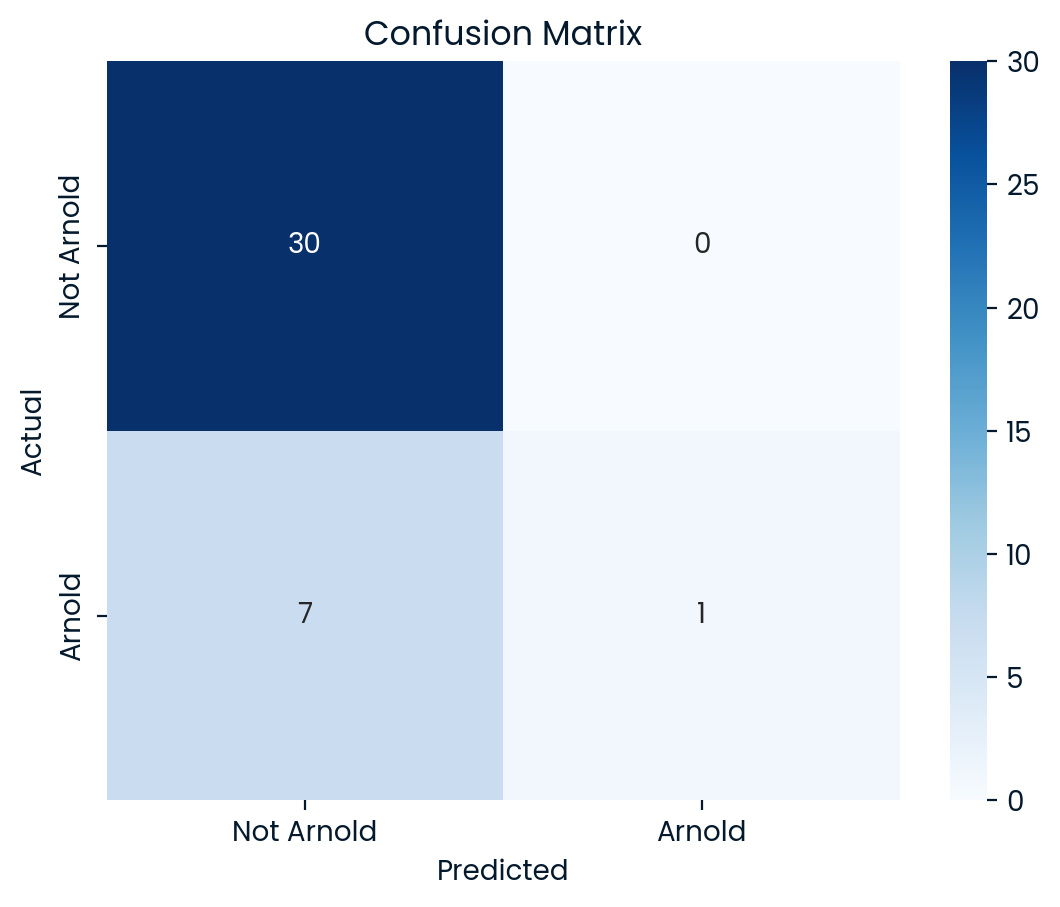

In [18]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Read the CSV file 
df = pd.read_csv("data/lfw_arnie_nonarnie.csv")

# Seperate the predictor and class label
X = df.drop('Label', axis=1)
y = df['Label'] 

# Split the data into training and testing sets using stratify to balance the class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Define classification models with pipelines
models = {
    "RandomForest": Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", RandomForestClassifier(random_state=42))
    ]),
    "SVC": Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", SVC(probability=True, random_state=42))
    ]),
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", LogisticRegression(random_state=42))
    ]),
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", KNeighborsClassifier())
    ])
}

# Define hyperparameter grids
param_grids = {
    "RandomForest": {"classifier__n_estimators": [50, 100, 200], "classifier__max_depth": [5, 10, None]},
    "SVC": {"classifier__C": [0.1, 1, 10], "classifier__kernel": ["linear", "rbf"]},
    "LogisticRegression": {"classifier__C": [0.1, 1, 10]},
    "KNN": {"classifier_n_neighbors": [3,5,7,9], "classifier__weights": ["uniform", "distance"]}
}

# Cross-validation setup
kf = KFold(n_splits=12, shuffle=True, random_state=42)

best_model_name = None
best_model_info = None
best_model_cv_score = 0
best_model = None

# Train and evaluate models using GridSearchCV
for name, pipeline in models.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    mean_cv_score = grid_search.best_score_
    
    if mean_cv_score > best_model_cv_score:
        best_model_cv_score = mean_cv_score
        best_model_name = name
        best_model_info = grid_search.best_params_
        best_model = grid_search.best_estimator_

# Evaluate best model on test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
score = accuracy

# Print results
print(f"Best Model: {best_model_name}")
print(f"Best Model Parameters: {best_model_info}")
print(f"Cross-validation Score: {best_model_cv_score:.4f}")
print(f"Test Accuracy: {score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Arnold', 'Arnold'], yticklabels=['Not Arnold', 'Arnold'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
